In [3]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
import numpy as np

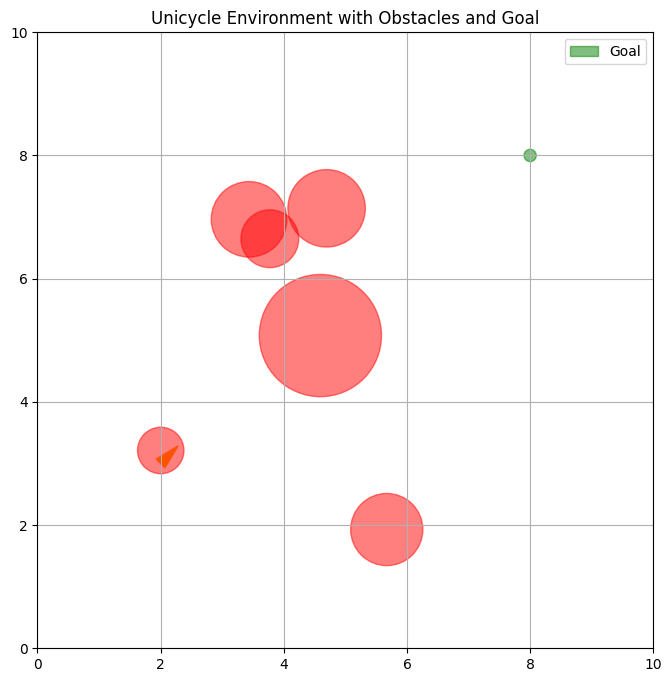

In [4]:


# Define the environment size
ENV_SIZE = 10

# Unicycle model parameters
class Unicycle:
    def __init__(self, x=0.0, y=0.0, theta=0.0, length=0.4, width=0.2):
        self.x = x
        self.y = y
        self.theta = theta  # heading angle in radians
        self.length = length
        self.width = width

        # components of along x and y
        self.dx = self.length * np.cos(self.theta)
        self.dy = self.length * np.sin(self.theta)
        self.center = ((self.x + self.dx) / 2, (self.y + self.dy) / 2)


    def draw(self, ax):
        # Triangle to represent the unicycle car

        # finding the rear coordinates of the triangle
        left = (self.x - 0.5 * self.width * np.sin(self.theta), self.y + 0.5 * self.width * np.cos(self.theta))
        right = (self.x + 0.5 * self.width * np.sin(self.theta), self.y - 0.5 * self.width * np.cos(self.theta))

        # tip coorindate is the origin + the components
        tip = (self.center[0] * 2.0, self.center[1] * 2.0)

        # last coordinate has to match the first one in order to  complete the outline
        triangle = np.array([left, right, tip, left])
        ax.fill(triangle[:,0], triangle[:,1], color='orange')

# Generate random circular obstacles
def generate_obstacles(num_obstacles, unicycle_center, tolerance_u, goal):
    obstacles = []
    while num_obstacles:
        x, y = np.random.uniform(0, ENV_SIZE, size=2)
        r = np.random.uniform(0.3, 1.0)
        
        
        unicycle_center_dist = np.hypot(x - unicycle_center[0], y - unicycle_center[1])
        goal_center_dist = np.hypot(x - goal[0], y - goal[1])
        
        if (unicycle_center_dist > r + tolerance_u) and (goal_center_dist > r + goal[-1]):
            obstacles.append((x, y ,r))
            num_obstacles-=1

    return obstacles



def draw_environment(unicycle, goal, obstacles):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.set_xlim(0, ENV_SIZE)
    ax.set_ylim(0, ENV_SIZE)
    ax.set_aspect('equal')
    
    # Draw unicycle
    unicycle.draw(ax)
    
    # Draw goal
    goal_circle = plt.Circle(goal[:-1], radius=goal[-1], color='green', alpha=0.5, label="Goal")
    ax.add_patch(goal_circle)

    # Draw obstacles
    for (x, y, r) in obstacles:
        circle = plt.Circle((x, y), r, color='red', alpha=0.5)
        ax.add_patch(circle)

    ax.legend()
    ax.set_title("Unicycle Environment with Obstacles and Goal")
    plt.grid(True)
    plt.show()

# Example usage
unicycle = Unicycle(x=2.0, y=3.0, theta=np.pi/4)
goal = (8.0, 8.0, 0.1)
obstacles = generate_obstacles(num_obstacles=6, unicycle_center=unicycle.center, tolerance_u=max(unicycle.length, unicycle.width), goal=goal)
draw_environment(unicycle, goal, obstacles)


